<!-- TOC -->

- [8.Tree-Based Methods](#8tree-based-methods)
    - [8.1 The Basics of Decision Trees](#81-the-basics-of-decision-trees)
        - [8.1.1 Regression Trees](#811-regression-trees)
        - [8.1.2 Classification Trees](#812-classification-trees)
        - [8.1.3 Trees Versus Linear Models](#813-trees-versus-linear-models)
    - [8.2 Bagging, Random Forests, Boosting](#82-bagging-random-forests-boosting)
        - [8.2.1 Bagging](#821-bagging)
        - [8.2.2 Random Forests](#822-random-forests)
        - [8.2.3 Boosting](#823-boosting)
    - [8.3 Lab: Decision Trees](#83-lab-decision-trees)
        - [8.3.1 Fitting Classification Trees](#831-fitting-classification-trees)
        - [8.3.2 Fitting Regression Trees](#832-fitting-regression-trees)
        - [8.3.3 Bagging and Random Forests](#833-bagging-and-random-forests)
        - [8.3.4 Boosting](#834-boosting)

<!-- /TOC -->

# 8.Tree-Based Methods
## 8.1 The Basics of Decision Trees
### 8.1.1 Regression Trees
Roughly speaking, there are two steps.

1. We divide the predictor space—that is, the set of possible values for X1, X2, . . . , Xp—into J distinct and non-overlapping regions, R1,R2,...,RJ.
1. For every observation that falls into the region Rj , we make the same prediction, which is simply the mean of the response values for the training observations in Rj.

The goal is to find boxes R1, . . . , RJ that minimize the RSS, given by

$\sum_{j=1}^J \sum_{i \in R_j}(y_i-\hat{y}_{R_j})^2\ (8.1)$

where $\hat{y}_{R_j}$ is the mean response for the training observations within the jth box. 

We take a **top-down** **greedy** approach that is known as **recursive binary splitting**.

In greater detail, for any j and s, we define the pair of half-planes

$R_1(j,s)=\{X|X_j < s\}\ and\ R_2(j,s)=\{X|X_j \ge s\},\ (8.2)$

and we seek the value of j and s that minimize the equation

$\sum_{i:x_i \in R_1(j,s)(y_i-\hat{y}_{R_1})^2}+\sum_{i:x_i \in R_2(j,s)(y_i-\hat{y}_{R_2})^2}\ (8.3)$

where $\hat{y}_{R_1}$ is the mean response for the training observations in $R_1(j,s)$, and $\hat{y}_{R_2}$ is the mean response for the training observations in $R_2(j,s)$.

Next, we repeat the process, looking for the best predictor and best cutpoint in order to split the data further so as to minimize the RSS within each of the resulting regions.

The process continues until a stopping criterion is reached; for instance, we may continue until no region contains more than five observations.

A smaller tree with fewer splits (that is, fewer regions R1,...,RJ) might lead to lower variance and better interpretation at the cost of a little bias.

A better strategy is to grow a very large tree $T_0$, and then **prune** it back in order to obtain a **subtree**.

**Cost complexity pruning**(weakest link pruning):Rather than considering every possible subtree, we consider a sequence of trees indexed by a nonnegative tuning parameter α.

Algorithm 8.1 Building a Regression Tree
1. Use recursive binary splitting to grow a large tree on the training data, stopping only when each terminal node has fewer than some minimum number of observations.
2. Apply cost complexity pruning to the large tree in order to obtain a sequence of best subtrees, as a function of α.
3. Use K-fold cross-validation to choose α. That is, divide the training observations into K folds. For each k = 1, . . . , K:
    1. Repeat Steps 1 and 2 on all but the kth fold of the training data. 
    1. Evaluate the mean squared prediction error on the data in the left-out kth fold, as a function of α.
    1. Average the results for each value of α, and pick α to minimize the average error.
4. Return the subtree from Step 2 that corresponds to the chosen value of α.

For each value of α there corresponds a subtree T ⊂ T0 such that

$\sum_{m=1}^{|T|}\sum_{i:x_i \in R_m}(y_i-\hat{y}_{R_m})^2+\alpha|T|\ (8.4)$

is as small as possible. Here |T| indicates the number of terminal nodes of the tree T , Rm is the rectangle (i.e. the subset of predictor space) corresponding to the mth terminal node,and $\hat{y}_{R_m}$ is the predicted response associated with $R_m$—that is, the mean of the training observations in Rm. The tuning parameter α controls a trade-off between the subtree’s complexity and its fit to the training data. 

![](http://ou8qjsj0m.bkt.clouddn.com//17-12-26/38637917.jpg)

### 8.1.2 Classification Trees
For a classification tree, we predict that each observation belongs to the **most commonly occurring class** of training observations in the region to which it belongs.

$E=1-max_k(\hat{p}_{mk})\ (8.5)$

Here $\hat{p}_{mk}$ represents the proportion of training observations in the mth region that are from the kth class.

The **Gini index** is defined by

$G=\sum_{k=1}^K \hat{p}_{mk}(1-\hat{p}_{mk}),\ (8.6)$

a measure of total variance across the K classes.

Gini index is referred to as a measure of node **purity**—a small value indicates that a node contains predominantly observations from a single class.

An alternative to the Gini index is **cross-entropy**, given by

$D=-\sum_{k=1}^K\hat{p}_{mk} log\hat{p}_{mk}\ (8.7)$

Since $0 \le \hat{p}_{mk} \le 1$, it follows that $0 \le -\hat{p}_{mk}log\hat{p}_{mk}$.

Like the Gini index, the cross-entropy will take on a small value if the mth node is pure.

### 8.1.3 Trees Versus Linear Models
Linear regression assumes a model of the form

$f(X)=\beta_0+\sum_{j=1}^p X_j\beta_j,\ (8.8)$

whereas regression trees assume a model of the form

$f(X)=\sum_{m=1}^M c_m \cdot 1_{(X \in R_m)}\ (8.9)$

where R1,...,RM represent a partition of feature space.

## 8.2 Bagging, Random Forests, Boosting
### 8.2.1 Bagging
The decision trees discussed in Section 8.1 suffer from **high variance**. This means that if we split the training data into two parts at random, and fit a decision tree to both halves, the results that we get could be quite different. In contrast, a procedure with low variance will yield similar results if applied repeatedly to distinct data sets; linear regression tends to have **low variance**, if the ratio of n to p is moderately large. **Bootstrap aggregation**, or **bagging**, is a general-purpose procedure for reducing the variance of a statistical learning method.

Recall that given a set of n independent observations $Z_1,\cdots,Z_n$, each with variance $\sigma^2$, the variance of the mean $\bar{Z}$ of the observations is given by $\sigma^2/n$. In other words, **averaging a set of observations reduces variance**. Hence a natural way to reduce the variance and hence increase the prediction accuracy of a statistical learning method is to take many training sets from the population, build a separate prediction model using each training set, and average the resulting predictions. In other words, we could calculate $\hat{f}^1(x),\hat{f}^2(x),\cdots,\hat{f}^B(x)$ using B separate training sets, and average them in order to obtain a single low-variance statistical learning model, given by

$\hat{f}_{avg}(x)=\frac{1}{B}\sum_{b=1}^B \hat{f}^b(x).$

Of course, this is not practical because we generally do not have access to multiple training sets. Instead, we can bootstrap, by taking repeated samples from the (single) training data set. In this approach we generate B different bootstrapped training data sets. We then train our method on the bth bootstrapped training set in order to get $\hat{f}^{*b}(x)$, and finally average all the predictions, to obtain

$\hat{f}_{bag}(x)=\frac{1}{B}\sum_{b=1}^B\hat{f}^{*b}(x).$

This is called **bagging**.

For a given test observation, we can record the class predicted by each of the B trees, and take a **majority vote**: the overall prediction is the most commonly occurring class among the B predictions.

On average, each bagged tree makes use of around two-thirds of the observations. The remaining one-third of the observations not used to fit a given bagged tree are referred to as the **out-of-bag** (OOB) observations.

![](http://ou8qjsj0m.bkt.clouddn.com//17-12-26/42992028.jpg)

### 8.2.2 Random Forests
A random sample of m predictors is chosen as split candidates from the full set of p predictors. The split is allowed to use only one of those m predictors. A fresh sample of m predictors is taken at each split, and typically we choose $m \approx \sqrt{p}$.

In other words, in building a random forest, at each split in the tree, the algorithm is **not even allowed to consider** a majority of the available predictors.

Suppose that there is one very strong predictor in the data set, along with a number of other moderately strong predictors. Then in the collection of bagged trees, most or all of the trees will use this strong predictor in the top split. Consequently, all of the bagged trees will look quite similar to each other. Hence the predictions from the bagged trees will be highly correlated.

Random forests overcome this problem by forcing each split to consider only a subset of the predictors. We can think of this process as **decorrelating** the trees, thereby making the average of the resulting trees less variable and hence more reliable.

### 8.2.3 Boosting
Boosting works in a similar way, except that the trees are grown **sequentially**: each tree is grown using information from previously grown trees. Boosting does not involve bootstrap sampling; instead each tree is fit on a modified version of the original data set.

Algorithm 8.2 Boosting for Regression Trees

1. Set $\hat{f}(x)=0$ and $r_i =y_i$ for all i in the training set.
1. For b=1,2,...,B,repeat:
    1. Fit a tree $\hat{f}^b$ with d splits(d+1 terminal nodes)to the training data (X, r).
    1. Update $\hat{f}$ by adding in a shrunken version of the new tree:$\hat{f}(x) \gets \hat{f}(x)+\lambda\hat{f}^b(x).\ (8.10)$
    1. Update the residuals, $r_i \gets r_i-\lambda\hat{f}^b(x_i).\ (8.11)$
1. Output the boosted model, $\hat{f}(x)=\sum_{b=1}^B\lambda\hat{f}^b(x).\ (8.12)$

## 8.3 Lab: Decision Trees
### 8.3.1 Fitting Classification Trees
We use the **ifelse()** function to create a variable, called High, which takes on a value of Yes if the Sales variable exceeds 8, and takes on a value of No otherwise.

In [1]:
library(tree)
library(ISLR)
attach(Carseats)
High=ifelse(Sales <=8,"No","Yes")
Carseats =data.frame(Carseats ,High)

We now use the **tree()** function to fit a classification tree in order to predict High using all variables but Sales.

In [2]:
tree.carseats =tree(High~.-Sales ,Carseats)
summary(tree.carseats)


Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

We see that the training error rate is 9%. For classification trees, the deviance reported in the output of **summary()** is given by

$-2\sum_m\sum_k n_{mk} log\hat{p}_{mk},$

where $n_{mk}$ is the number of observations in the mth terminal node that belong to the kth class.

The residual mean deviance reported is simply the deviance divided by n−|T0|, which in this case is 400−27 = 373.

We use the **plot()** function to display the tree structure, and the text() function to display the node labels. The argument **pretty=0** instructs R to include the category names for any qualitative predictors, rather than simply displaying a letter for each category.

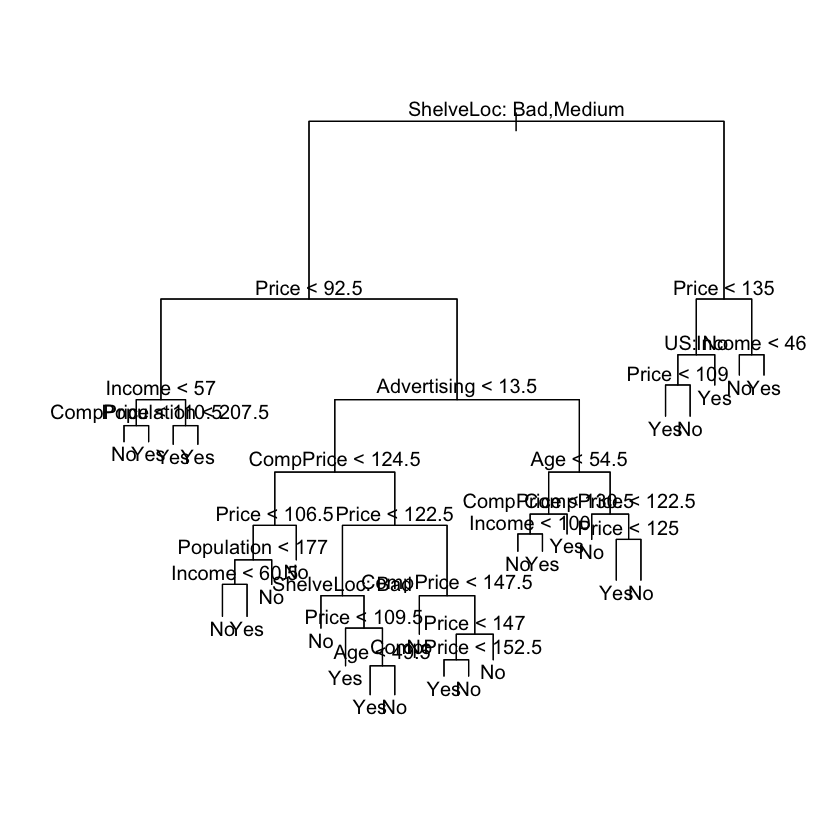

In [3]:
plot(tree.carseats)
text(tree.carseats ,pretty=0)

Branches that lead to terminal nodes are indicated using asterisks.

In [4]:
tree.carseats

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 400 541.500 No ( 0.59000 0.41000 )  
    2) ShelveLoc: Bad,Medium 315 390.600 No ( 0.68889 0.31111 )  
      4) Price < 92.5 46  56.530 Yes ( 0.30435 0.69565 )  
        8) Income < 57 10  12.220 No ( 0.70000 0.30000 )  
         16) CompPrice < 110.5 5   0.000 No ( 1.00000 0.00000 ) *
         17) CompPrice > 110.5 5   6.730 Yes ( 0.40000 0.60000 ) *
        9) Income > 57 36  35.470 Yes ( 0.19444 0.80556 )  
         18) Population < 207.5 16  21.170 Yes ( 0.37500 0.62500 ) *
         19) Population > 207.5 20   7.941 Yes ( 0.05000 0.95000 ) *
      5) Price > 92.5 269 299.800 No ( 0.75465 0.24535 )  
       10) Advertising < 13.5 224 213.200 No ( 0.81696 0.18304 )  
         20) CompPrice < 124.5 96  44.890 No ( 0.93750 0.06250 )  
           40) Price < 106.5 38  33.150 No ( 0.84211 0.15789 )  
             80) Population < 177 12  16.300 No ( 0.58333 0.41667 )  
              160) Income < 60.5 6   0

In [5]:
set.seed(2)
train=sample(1:nrow(Carseats), 200)
Carseats.test=Carseats[-train,]
High.test=High[-train]
tree.carseats=tree(High~.-Sales,Carseats,subset=train)
tree.pred=predict(tree.carseats,Carseats.test,type="class")
table(tree.pred ,High.test)

         High.test
tree.pred No Yes
      No  86  27
      Yes 30  57

In [6]:
(86+57)/200

[1] 0.715

The function **cv.tree()** performs cross-validation in order to determine the optimal level of tree complexity; cost complexity pruning is used in order to select a sequence of trees for consideration. We use the argument **FUN=prune.misclass** in order to indicate that we want the classification error rate to guide the cross-validation and pruning process, rather than the default for the cv.tree() function, which is deviance.

In [7]:
set.seed(3)
cv.carseats =cv.tree(tree.carseats,FUN=prune.misclass)
names(cv.carseats)

[1] "size"   "dev"    "k"      "method"

In [8]:
cv.carseats

$size
[1] 19 17 14 13  9  7  3  2  1

$dev
[1] 55 55 53 52 50 56 69 65 80

$k
[1]       -Inf  0.0000000  0.6666667  1.0000000  1.7500000  2.0000000  4.2500000
[8]  5.0000000 23.0000000

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

Note that, despite the name, dev corresponds to the cross-validation error rate in this instance. The tree with 9 terminal nodes results in the lowest cross-validation error rate, with 50 cross-validation errors.

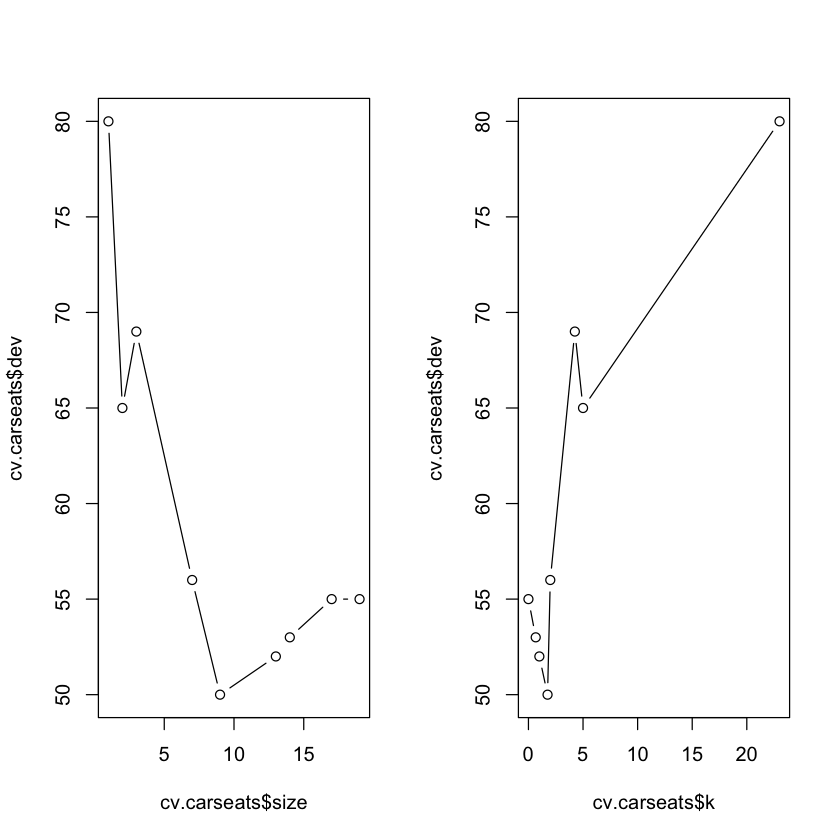

In [9]:
par(mfrow=c(1,2))
plot(cv.carseats$size,cv.carseats$dev,type="b")
plot(cv.carseats$k,cv.carseats$dev,type="b")

We now apply the **prune.misclass()** function in order to prune the tree to obtain the nine-node tree.

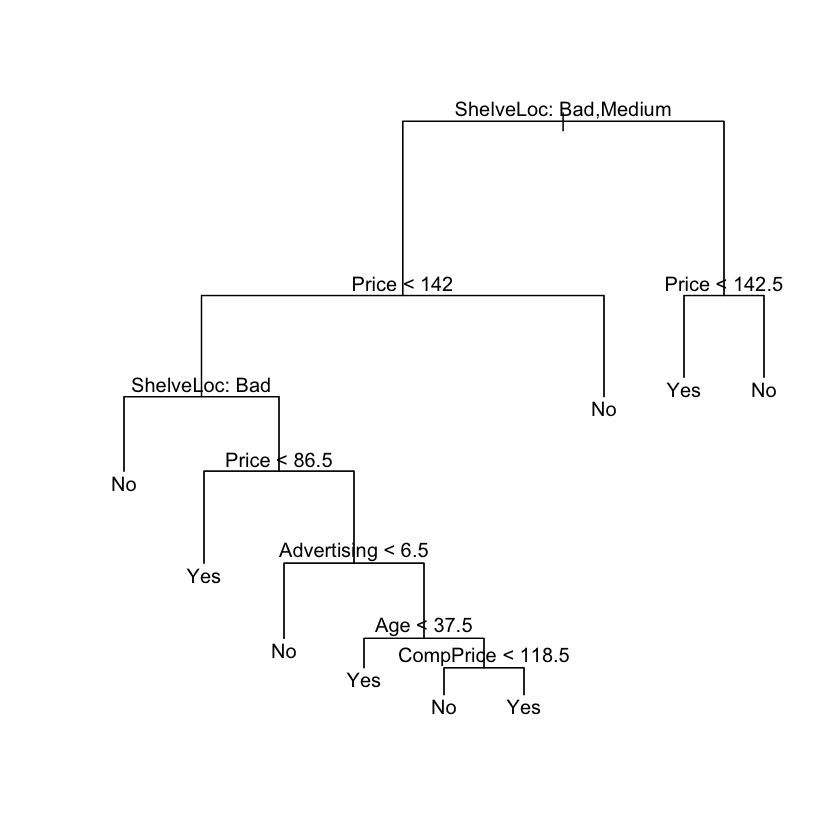

In [10]:
prune.carseats=prune.misclass(tree.carseats,best=9)
plot(prune.carseats)
text(prune.carseats,pretty=0)

In [11]:
tree.pred=predict(prune.carseats,Carseats.test,type="class")
table(tree.pred ,High.test)

         High.test
tree.pred No Yes
      No  94  24
      Yes 22  60

In [12]:
(94+60)/200

[1] 0.77

### 8.3.2 Fitting Regression Trees

In [13]:
library(MASS)
set.seed(1)
train = sample(1:nrow(Boston), nrow(Boston)/2)
tree.boston=tree(medv~.,Boston,subset=train)
summary(tree.boston)


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "lstat" "rm"    "dis"  
Number of terminal nodes:  8 
Residual mean deviance:  12.65 = 3099 / 245 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-14.10000  -2.04200  -0.05357   0.00000   1.96000  12.60000 

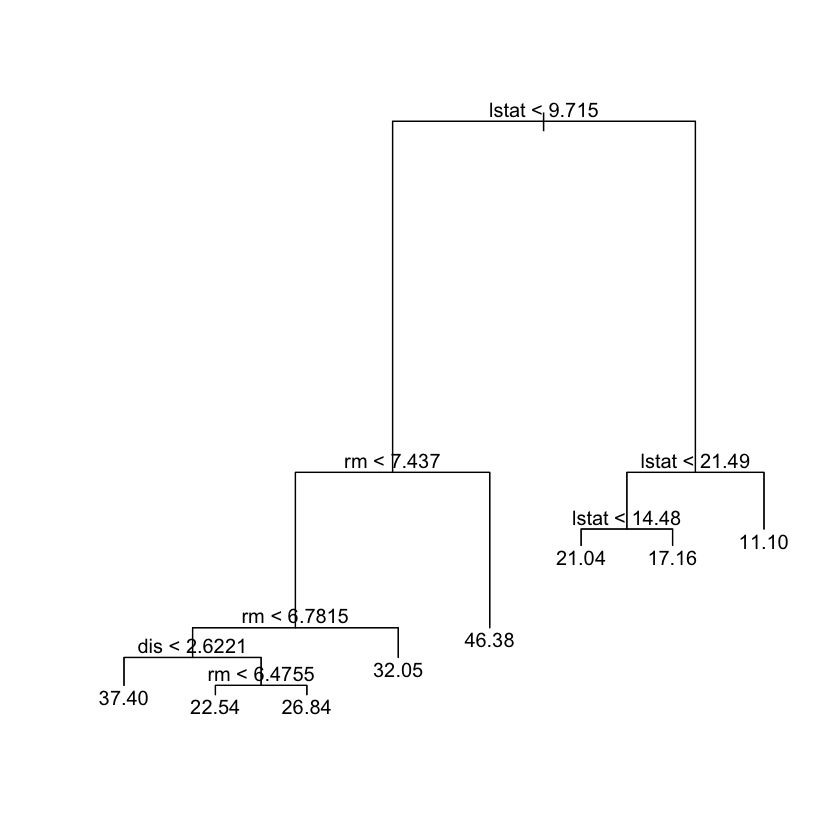

In [14]:
plot(tree.boston)
text(tree.boston,pretty=0)

Now we use the **cv.tree()** function to see whether pruning the tree will improve performance.

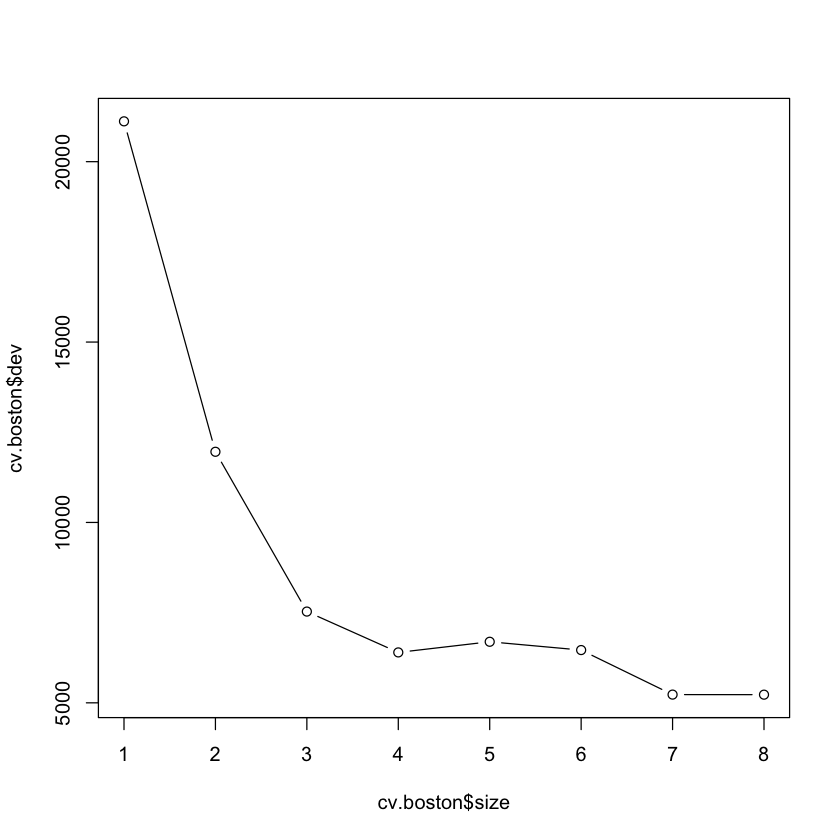

In [15]:
cv.boston=cv.tree(tree.boston)
plot(cv.boston$size,cv.boston$dev,type='b')

In this case, the most complex tree is selected by cross-validation. However, if we wish to prune the tree, we could do so as follows, using the **prune.tree()** function:

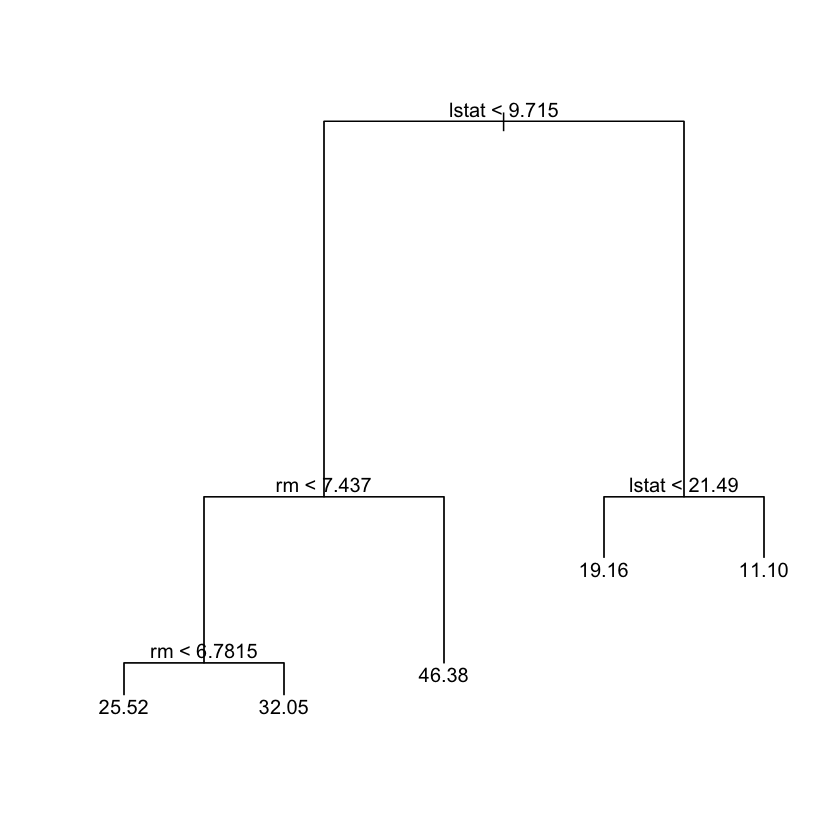

In [16]:
prune.boston=prune.tree(tree.boston,best=5)
plot(prune.boston)
text(prune.boston,pretty=0)

In keeping with the cross-validation results, we use the unpruned tree to make predictions on the test set.

[1] 25.04559

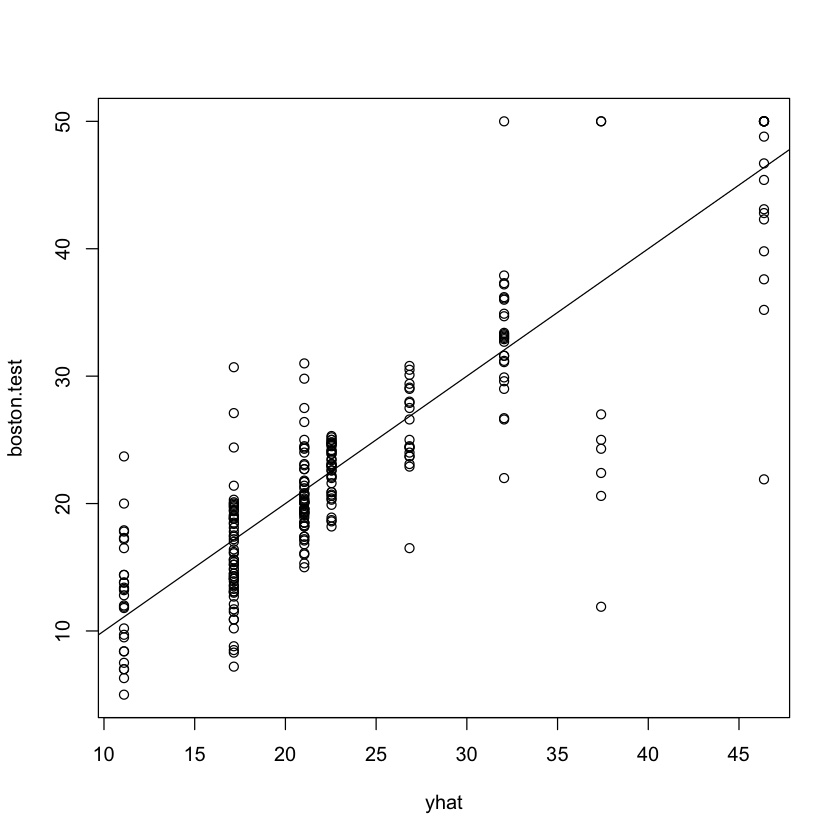

In [17]:
yhat=predict(tree.boston,newdata=Boston[-train,])
boston.test=Boston[-train ,"medv"]
plot(yhat,boston.test)
abline (0 ,1)
mean((yhat-boston.test)^2)

### 8.3.3 Bagging and Random Forests
We perform bagging as follows:

In [19]:
library(randomForest)
set.seed(1)
bag.boston=randomForest(medv~.,data=Boston,subset=train,mtry=13,importance=TRUE)
bag.boston


Call:
 randomForest(formula = medv ~ ., data = Boston, mtry = 13, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 11.02509
                    % Var explained: 86.65

The argument **mtry=13** indicates that all 13 predictors should be considered for each split of the tree—in other words, that bagging should be done.

[1] 13.47349

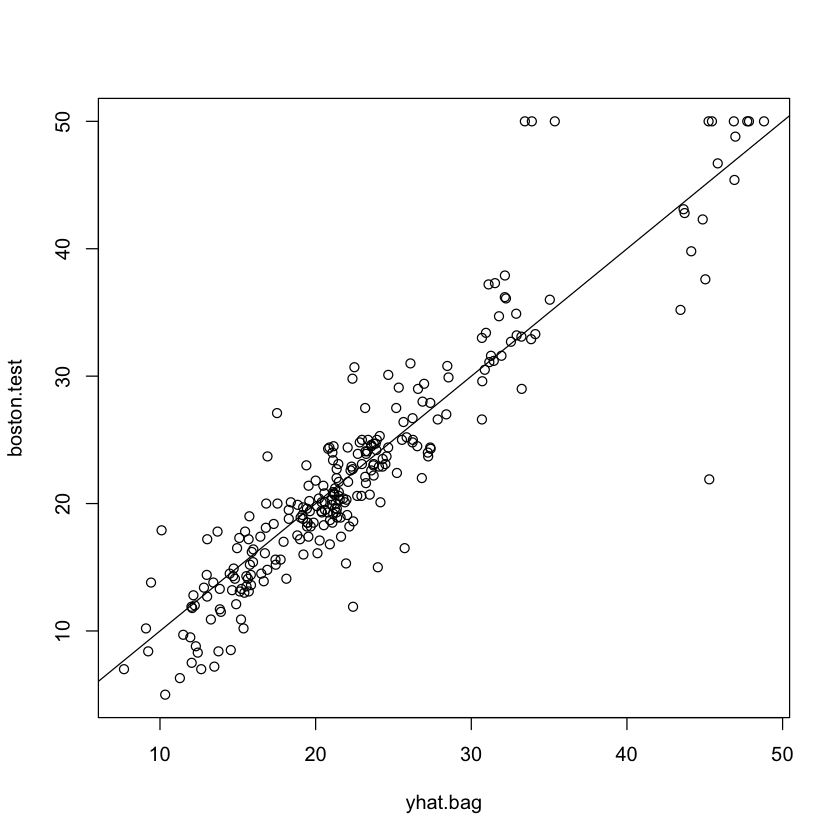

In [20]:
yhat.bag = predict(bag.boston,newdata=Boston[-train ,])
plot(yhat.bag, boston.test)
abline(0 ,1)
mean((yhat.bag-boston.test)^2)

We could change the number of trees grown by **randomForest()** using the **ntree** argument:

In [21]:
bag.boston=randomForest(medv~.,data=Boston,subset=train,mtry=13,ntree=25)
yhat.bag=predict(bag.boston,newdata=Boston[-train ,])
mean((yhat.bag-boston.test)^2)

[1] 13.43068

By default, **randomForest()** uses p/3 variables when building a random forest of regression trees, and $\sqrt{p}$ variables when building a random forest of classification trees. Here we use mtry = 6.

In [22]:
set.seed (1)
rf.boston=randomForest(medv~.,data=Boston,subset=train,mtry=6,importance=TRUE)
yhat.rf=predict(rf.boston,newdata=Boston[-train ,])
mean((yhat.rf-boston.test)^2)

[1] 11.48022

Using the **importance()** function, we can view the importance of each variable.

In [23]:
importance(rf.boston)

,%IncMSE,IncNodePurity
crim,12.547772,1094.65382
zn,1.375489,64.40060
indus,9.304258,1086.09103
chas,2.518766,76.36804
nox,12.835614,1008.73703
rm,31.646147,6705.02638
age,9.970243,575.13702
dis,12.774430,1351.01978
rad,3.911852,93.78200
tax,7.624043,453.19472


Two measures of variable importance are reported. The former is based upon the mean decrease of accuracy in predictions on the out of bag samples when a given variable is excluded from the model. The latter is a measure of the total decrease in node impurity that results from splits over that variable, averaged over all trees.

Plots of these importance measures can be produced using the **varImpPlot()** function.

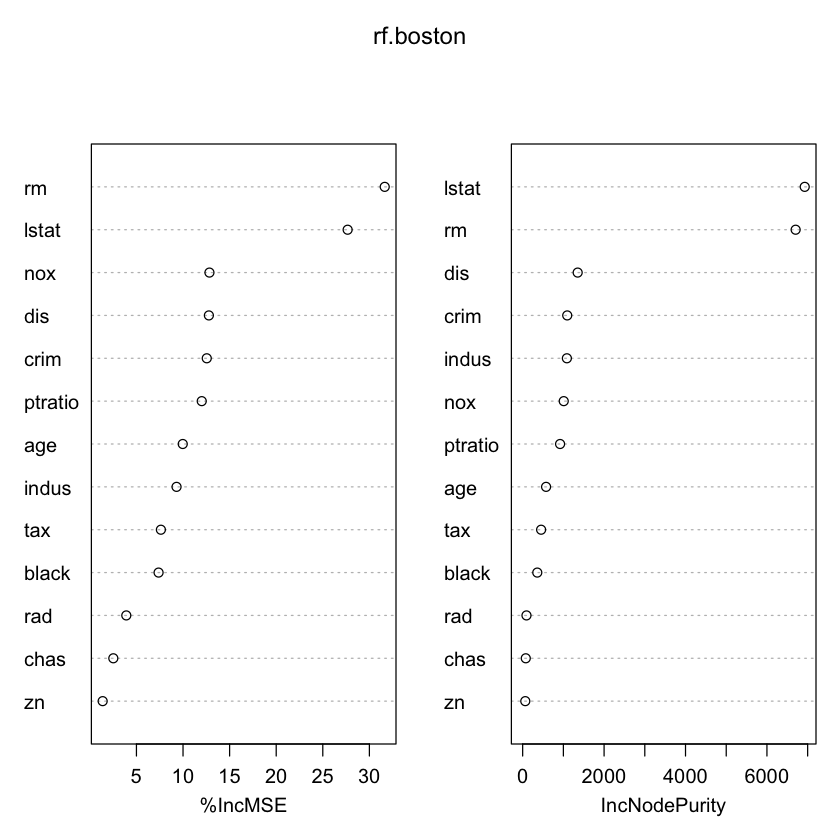

In [24]:
varImpPlot(rf.boston)

### 8.3.4 Boosting
We run **gbm()** with the option **distribution="gaussian"** since this is a regression problem; if it were a binary classification problem, we would use **distribution="bernoulli"**. The argument **n.trees=5000** indicates that we want 5000 trees, and the option **interaction.depth=4** limits the depth of each tree.

,var,rel.inf
lstat,lstat,45.9627334
rm,rm,31.2238187
dis,dis,6.8087398
crim,crim,4.0743784
nox,nox,2.5605001
ptratio,ptratio,2.2748652
black,black,1.7971159
age,age,1.6488532
tax,tax,1.3595005
indus,indus,1.2705924


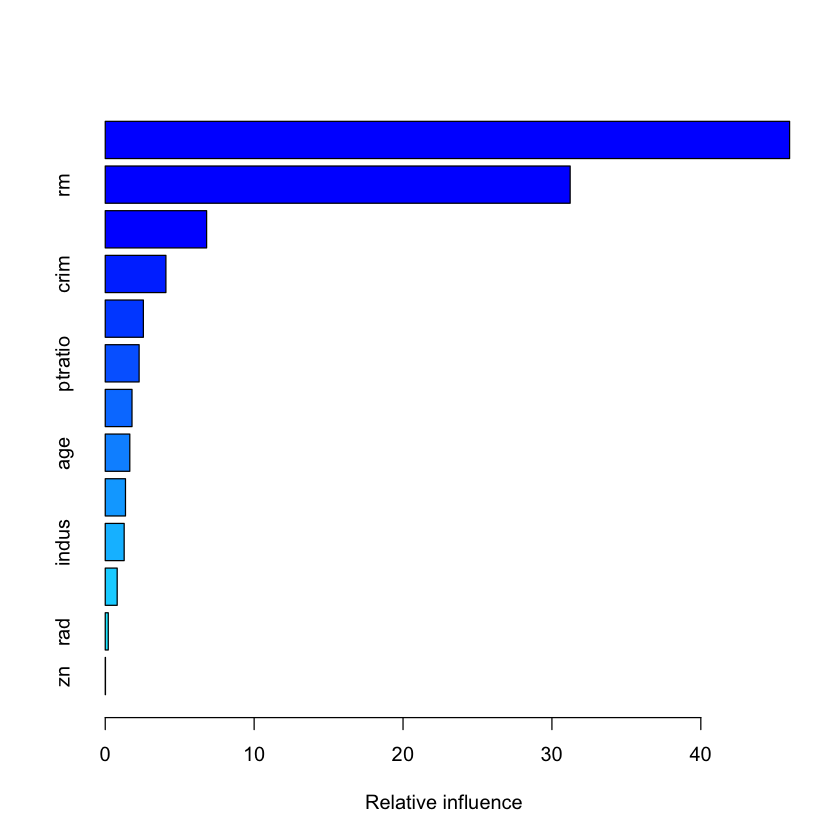

In [27]:
library(gbm)
set.seed(1)
boost.boston=gbm(medv~.,data=Boston[train,],distribution="gaussian",n.trees=5000,interaction.depth=4)
summary(boost.boston)

We now use the boosted model to predict medv on the test set:

In [28]:
yhat.boost=predict(boost.boston,newdata=Boston[-train,], n.trees=5000)
mean((yhat.boost-boston.test)^2)

[1] 11.84434

Here we take λ = 0.2.

In [29]:
boost.boston=gbm(medv~.,data=Boston[train,],distribution="gaussian",n.trees=5000,interaction.depth=4,shrinkage=0.2,verbose=F)
yhat.boost=predict(boost.boston,newdata=Boston[-train,],n.trees=5000)
mean((yhat.boost-boston.test)^2)

[1] 11.51109